In [1]:
from quantopian.interactive.data.sentdex import sentiment

In [2]:
from quantopian.pipeline.filters.morningstar import Q1500US

In [3]:
type(sentiment)

<class 'blaze.expr.expressions.Field'>

In [4]:
BAC = symbols('BAC').sid
bac_sentiment = sentiment[(sentiment.sid == BAC)]

In [5]:
bac_sentiment.head().peek()

,symbol,sentiment_signal,sid,asof_date,timestamp
0,BAC,6.0,700,2012-11-14,2012-11-15
1,BAC,1.0,700,2012-11-15,2012-11-16
2,BAC,-1.0,700,2012-11-16,2012-11-17
3,BAC,-1.0,700,2012-11-17,2012-11-18
4,BAC,-1.0,700,2012-11-18,2012-11-19
5,BAC,6.0,700,2012-11-19,2012-11-20
6,BAC,6.0,700,2012-11-20,2012-11-21
7,BAC,6.0,700,2012-11-21,2012-11-22
8,BAC,6.0,700,2012-11-22,2012-11-23
9,BAC,6.0,700,2012-11-23,2012-11-24


In [6]:
import blaze 

In [7]:
bac_sentiment = blaze.compute(bac_sentiment)

In [8]:
type(bac_sentiment)

<class 'pandas.core.frame.DataFrame'>

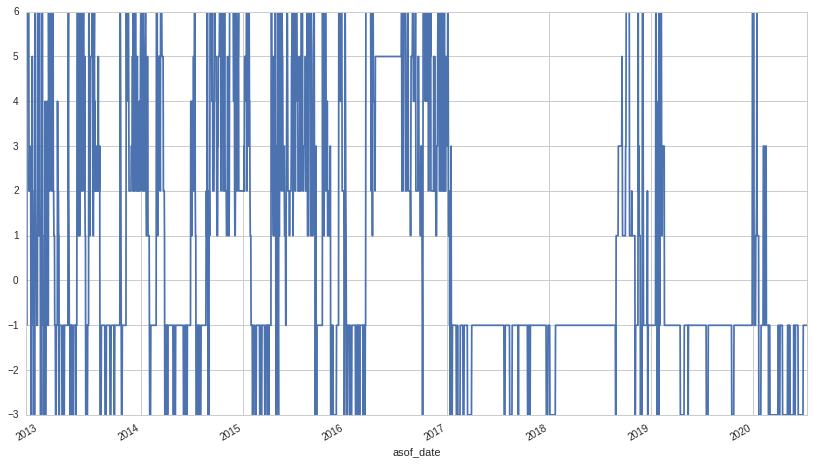

In [9]:
bac_sentiment.set_index('asof_date', inplace = True)
bac_sentiment['sentiment_signal'].plot()

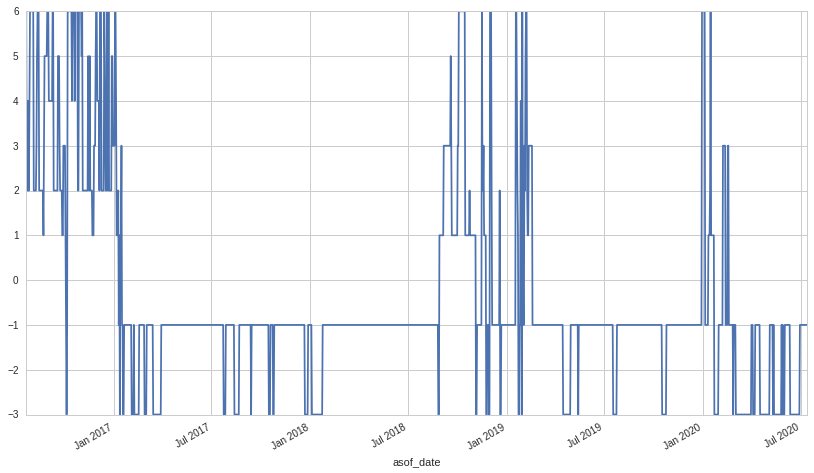

In [10]:
bac_sentiment = bac_sentiment[(bac_sentiment.index > '2016-06-01')]
bac_sentiment['sentiment_signal'].plot()

In [11]:
from quantopian.pipeline import Pipeline
def make_pipeline():
    return Pipeline()

In [12]:
from quantopian.research import run_pipeline

In [13]:
result = run_pipeline(make_pipeline(), start_date = '2015-05-05', end_date = '2016-05-05')

In [14]:
type(result)
from quantopian.pipeline.data.sentdex import sentiment

In [15]:
result.head()

Empty DataFrame
Columns: []
Index: [(2015-05-05 00:00:00+00:00, Equity(2 [HWM])), (2015-05-05 00:00:00+00:00, Equity(21 [AAME])), (2015-05-05 00:00:00+00:00, Equity(24 [AAPL])), (2015-05-05 00:00:00+00:00, Equity(25 [HWM_PR])), (2015-05-05 00:00:00+00:00, Equity(31 [ABAX]))]

In [16]:
len(result)

2124384

In [17]:
def make_pipeline():
    sentiment_factor = sentiment.sentiment_signal.latest
    universe = (Q1500US() & sentiment_factor.notnull())
    pipe = Pipeline(columns = {'sentiment':sentiment_factor,
                              'longs': (sentiment_factor >= 4),
                              'shorts': (sentiment_factor <= -2)},
                   screen = universe)
    return pipe
    

In [18]:
result = run_pipeline(make_pipeline(), start_date = '2015-05-05', end_date = '2016-05-05')

In [19]:
result.head()

longs  sentiment shorts
2015-05-05 00:00:00+00:00 Equity(2 [HWM])    False       -3.0   True
                          Equity(24 [AAPL])  False       -1.0  False
                          Equity(62 [ABT])   False       -3.0   True
                          Equity(67 [ADSK])   True        4.0  False
                          Equity(76 [TAP])   False       -1.0  False

In [20]:
assets = result.index.levels[1].unique()
len(assets)

9629

In [21]:
pricing = get_pricing(assets, start_date = '2015-05-05', end_date = '2016-05-05', fields = 'open_price')

Dropped 4.0% entries from factor data: 4.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,-3.0,-1.0,-1.572948,0.904233,78248,64.20296
2,1.0,6.0,3.388718,1.963221,43628,35.79704


Returns Analysis


,1D,5D,10D
Ann. alpha,0.019,0.026,0.021
beta,-0.028,-0.041,-0.063
Mean Period Wise Return Top Quantile (bps),0.472,0.596,0.591
Mean Period Wise Return Bottom Quantile (bps),-0.359,-0.415,-0.374
Mean Period Wise Spread (bps),0.832,1.000,0.951


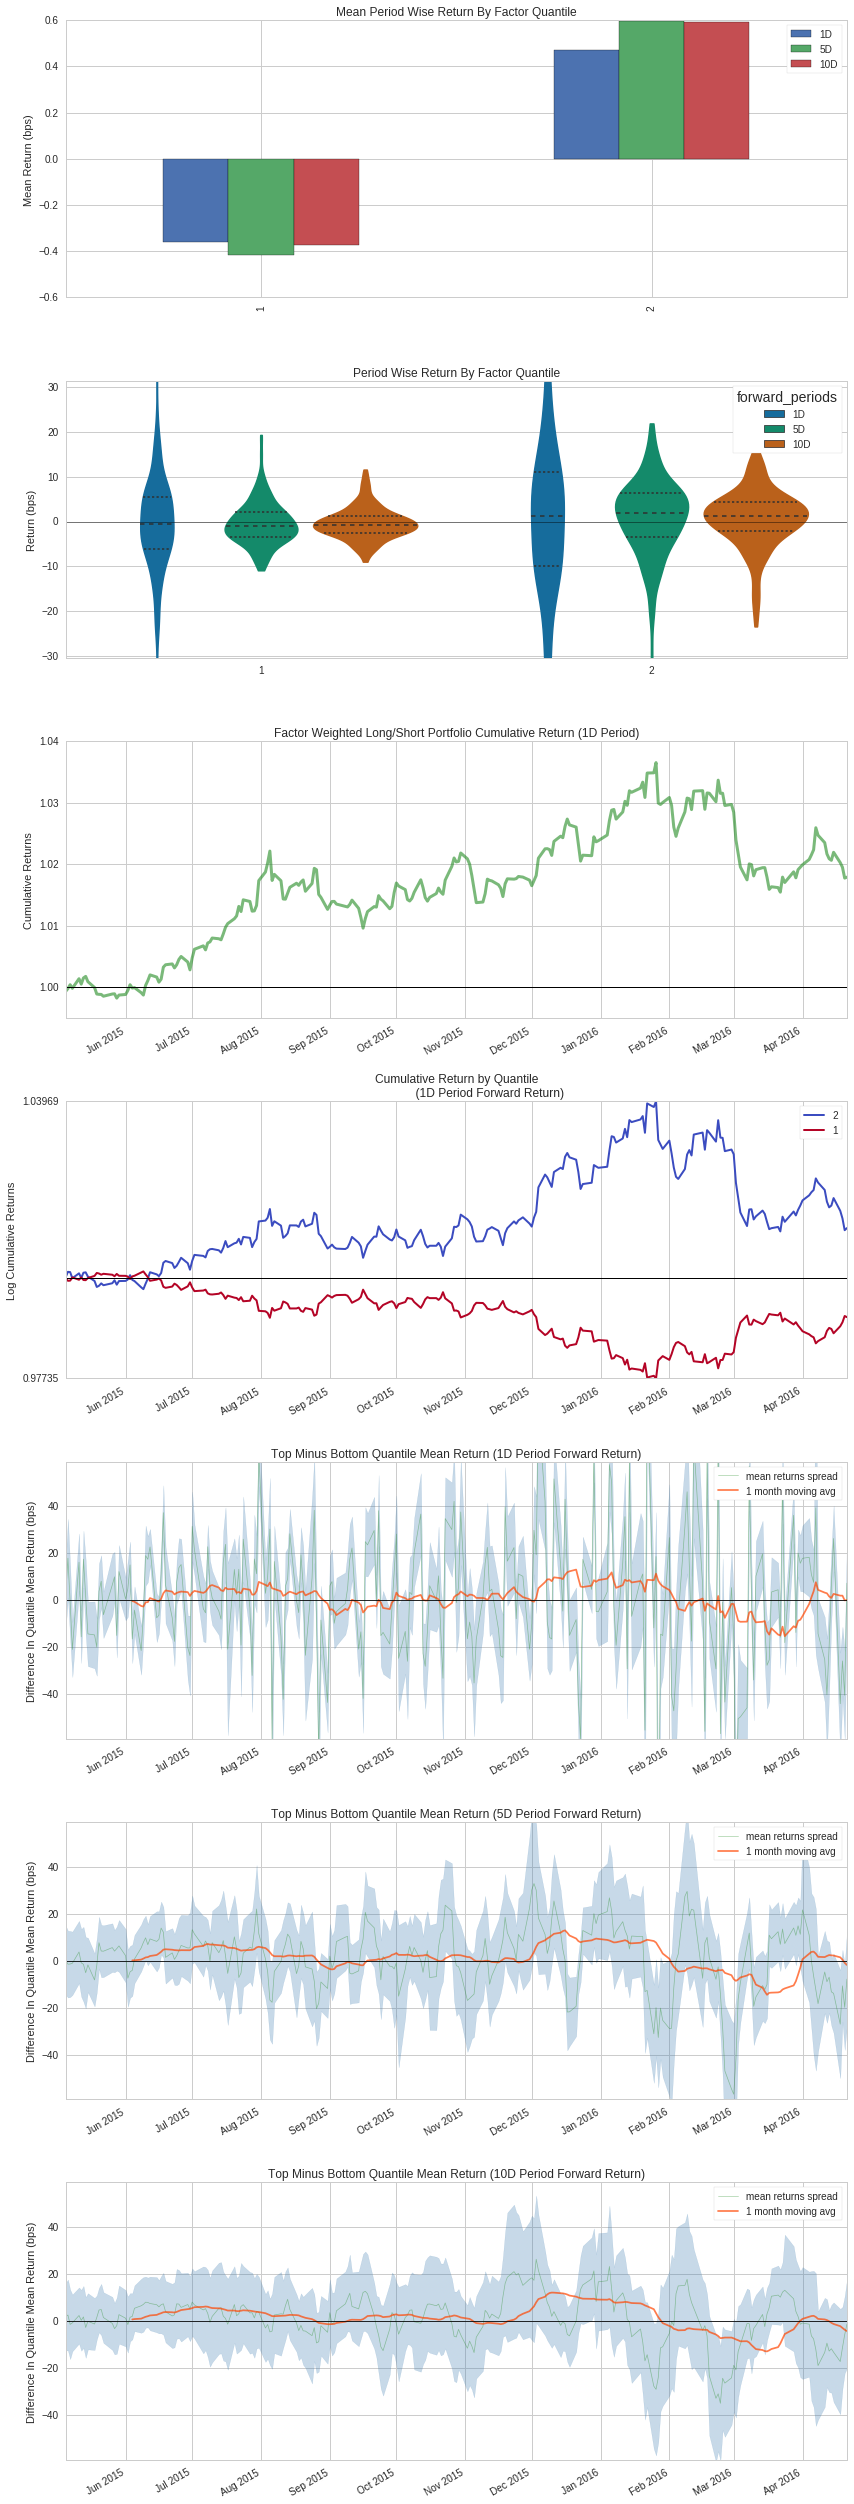

Information Analysis


,1D,5D,10D
IC Mean,0.006,0.015,0.019
IC Std.,0.062,0.067,0.067
Risk-Adjusted IC,0.095,0.222,0.285
t-stat(IC),1.488,3.463,4.458
p-value(IC),0.138,0.001,0.000
IC Skew,-0.002,-0.295,-0.271
IC Kurtosis,-0.357,-0.545,-0.768


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


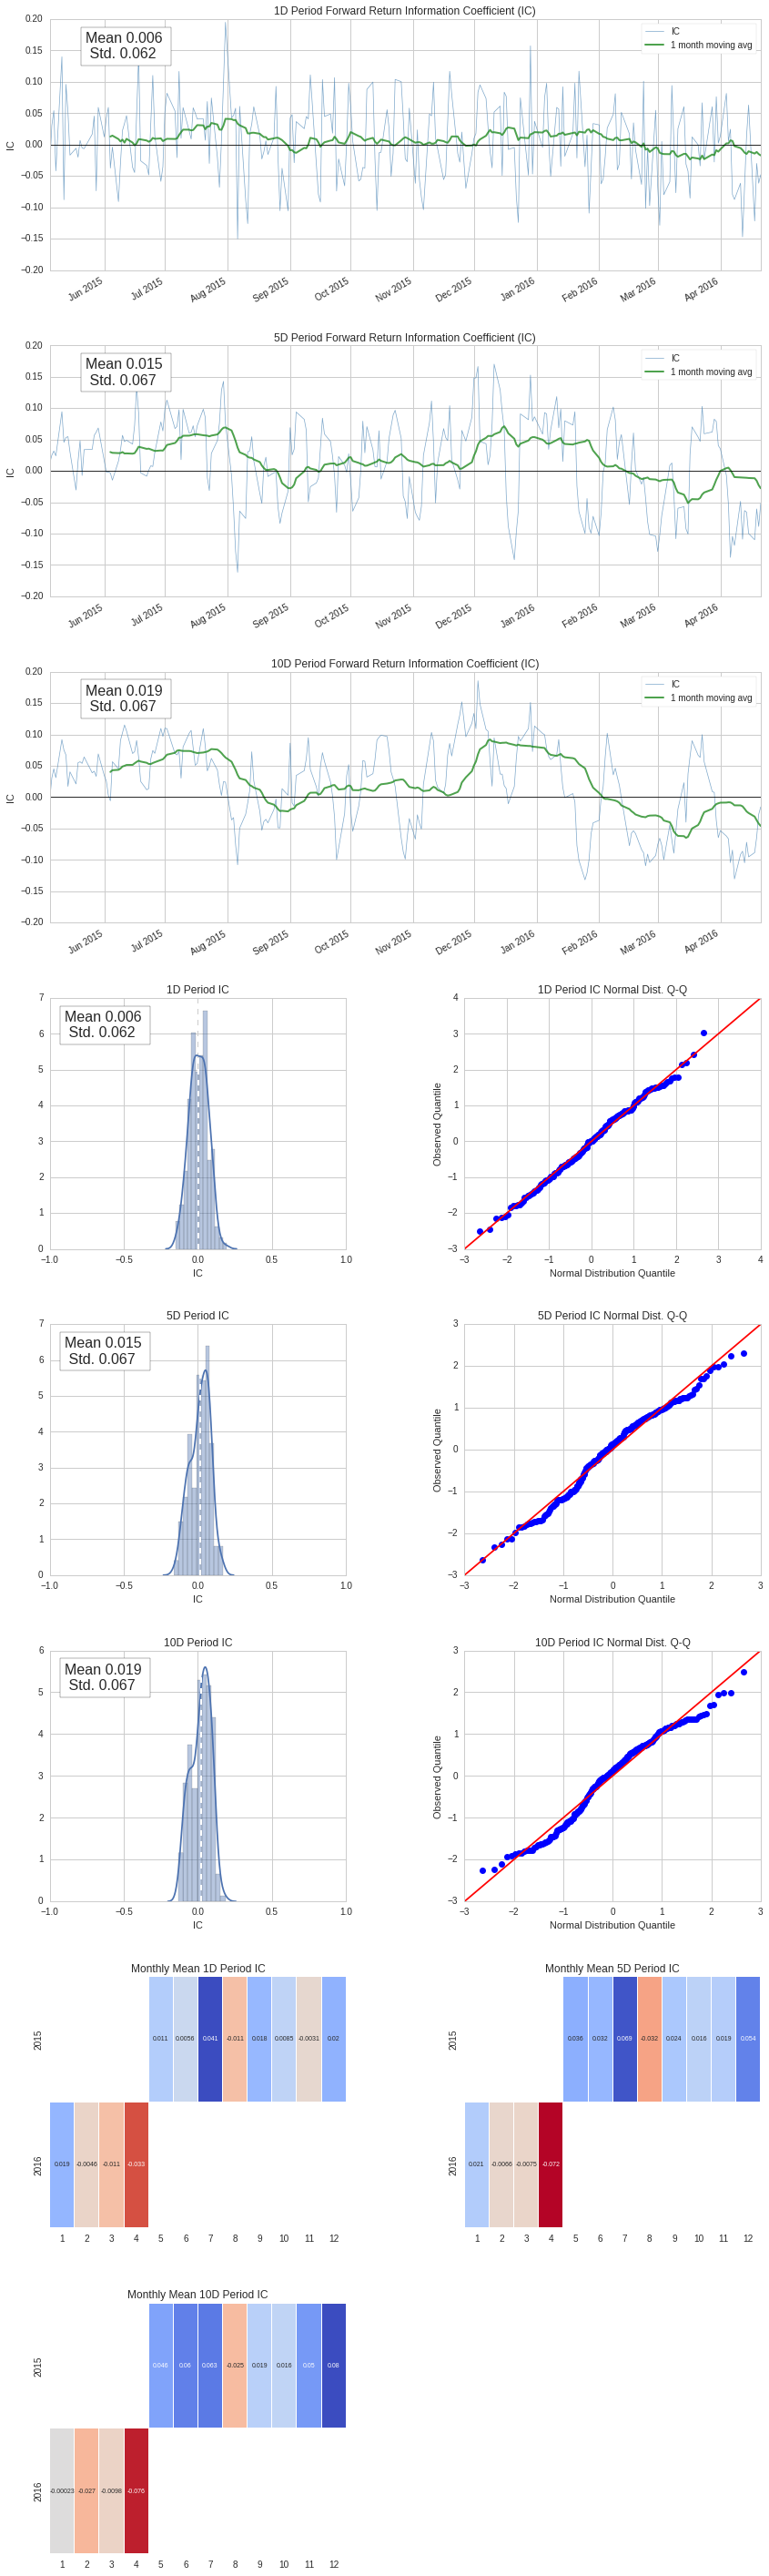

/venvs/py35/lib/python3.5/site-packages/alphalens/utils.py:912: UserWarning: Skipping return periods that aren't exact multiples of days.
  + " of days."


Turnover Analysis


,1D,5D,10D
Quantile 1 Mean Turnover,0.029,0.079,0.112
Quantile 2 Mean Turnover,0.053,0.141,0.200


,1D,5D,10D
Mean Factor Rank Autocorrelation,0.889,0.718,0.611


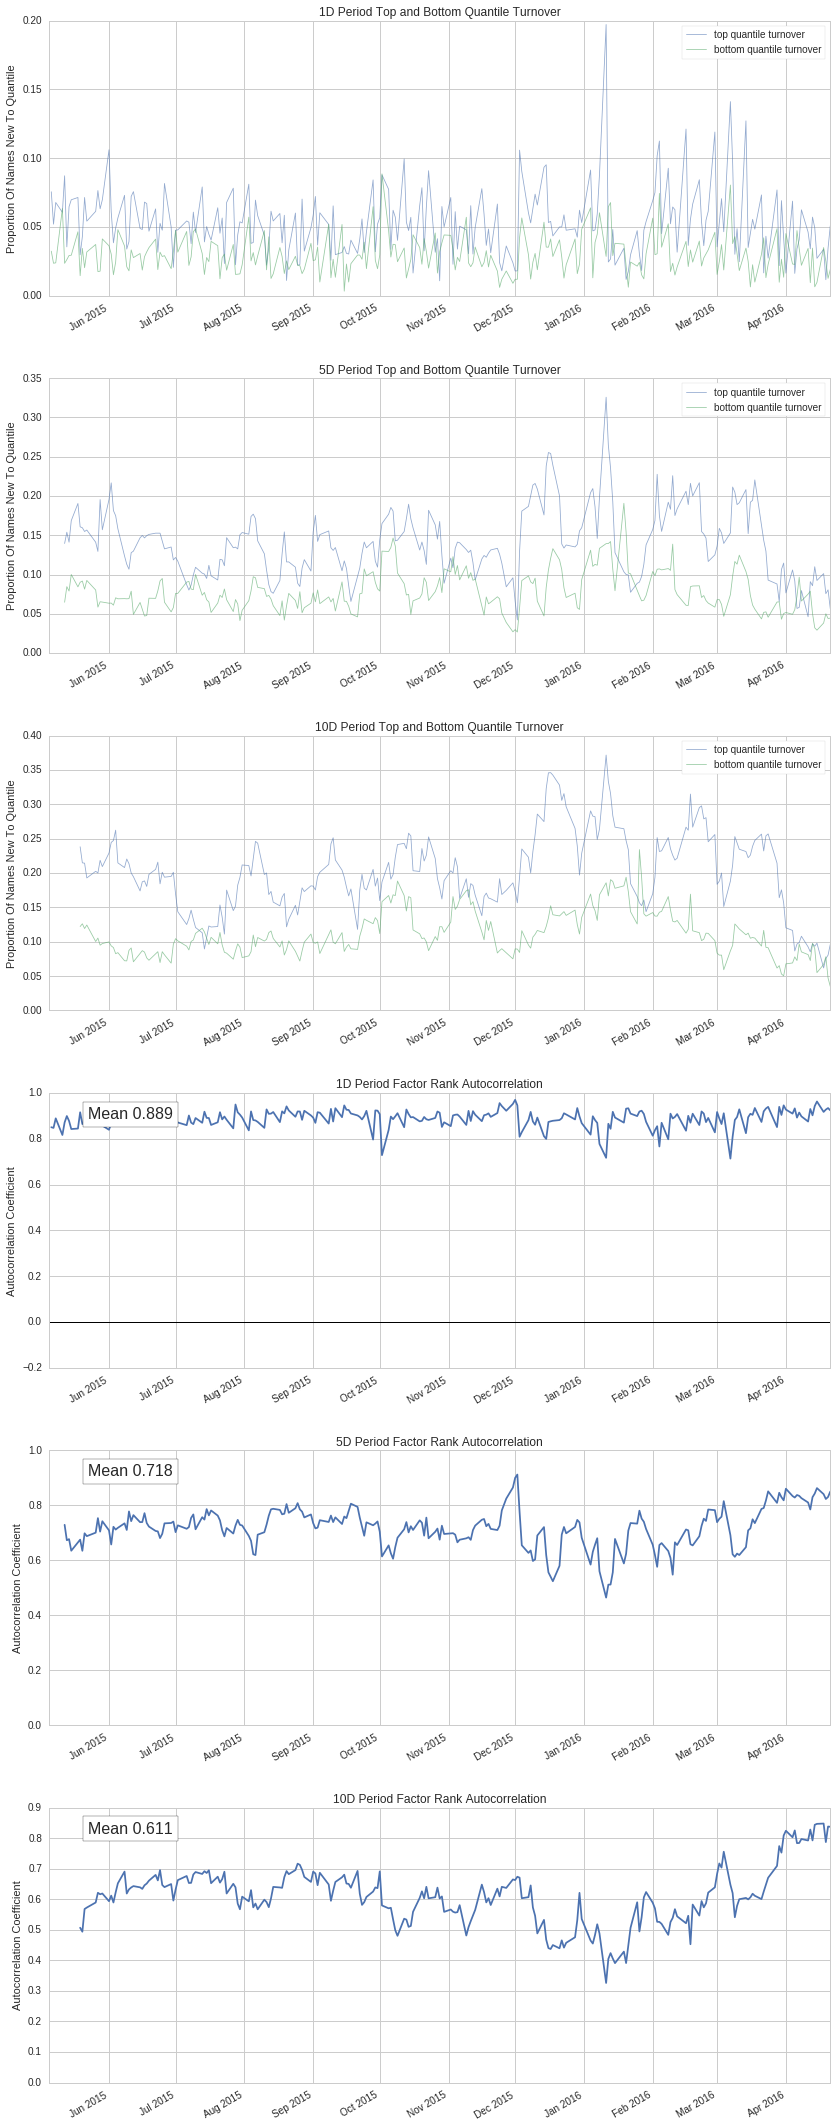

In [22]:
import alphalens

factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor = result['sentiment'], prices = pricing, quantiles = 2, periods = (1,5,10))

alphalens.tears.create_full_tear_sheet(factor_data)


In [1]:
bt = get_backtest('5f0c96aae8e39b46abf18b86')

100% Time:  0:00:07|##########################################################|


Start date,2015-05-05
End date,2016-05-05
Total months,12
,Backtest
Annual return,-0.509%
Cumulative returns,-0.513%
Annual volatility,3.122%
Sharpe ratio,-0.15
Calmar ratio,-0.15
Stability,0.02
Max drawdown,-3.387%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,3.39,2015-08-05,2016-04-27,NaT,NaN
1,0.66,2015-05-14,2015-05-29,2015-07-06,38
2,0.32,2015-07-22,2015-07-29,2015-07-31,8
3,0.17,2015-05-11,2015-05-12,2015-05-14,4
4,0.08,2015-05-07,2015-05-08,2015-05-11,3


/venvs/py35/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Stress Events,mean,min,max
Fall2015,-0.02%,-0.53%,0.34%
New Normal,-0.00%,-0.89%,0.59%


Top 10 long positions of all time,max
CTXS-14014,1.01%
JBL-8831,1.01%
TXT-7674,1.00%
AEE-24783,1.00%
CMI-1985,1.00%
DISC_A-36930,1.00%
ADBE-114,1.00%
UNH-7792,1.00%
PBI-5773,1.00%
VZ-21839,1.00%


Top 10 short positions of all time,max
PVTB-20273,-0.73%
NWSA-44931,-0.73%
AMD-351,-0.73%
CCI-19258,-0.73%
BIIB-3806,-0.73%
AMT-24760,-0.73%
ABC-22954,-0.73%
MNKD-26524,-0.73%
ETFC-15474,-0.73%
DFS-34011,-0.73%


Top 10 positions of all time,max
CTXS-14014,1.01%
JBL-8831,1.01%
TXT-7674,1.00%
AEE-24783,1.00%
CMI-1985,1.00%
DISC_A-36930,1.00%
ADBE-114,1.00%
UNH-7792,1.00%
PBI-5773,1.00%
VZ-21839,1.00%


/venvs/py35/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
/venvs/py35/src/pyfolio/pyfolio/perf_attrib.py:612: UserWarning: This algorithm has relatively high turnover of its positions. As a result, performance attribution might not be fully accurate.

Performance attribution is calculated based on end-of-day holdings and does not account for intraday activity. Algorithms that derive a high percentage of returns from buying and selling within the same day may receive inaccurate performance attribution.

  warnings.warn(warning_msg)


## Performance Relative to Common Risk Factors

Summary Statistics,
Annualized Specific Return,-1.58%
Annualized Common Return,1.09%
Annualized Total Return,-0.51%
Specific Sharpe Ratio,-0.63


Exposures Summary,Average Risk Factor Exposure,Annualized Return,Cumulative Return
basic_materials,-0.00,-0.23%,-0.23%
consumer_cyclical,0.02,-0.01%,-0.01%
financial_services,-0.01,-0.45%,-0.45%
real_estate,-0.00,-0.20%,-0.20%
consumer_defensive,-0.00,-0.27%,-0.27%
health_care,0.02,0.13%,0.13%
utilities,-0.00,-0.05%,-0.05%
communication_services,0.00,0.25%,0.25%
energy,-0.06,1.18%,1.19%
industrials,0.00,-0.13%,-0.13%


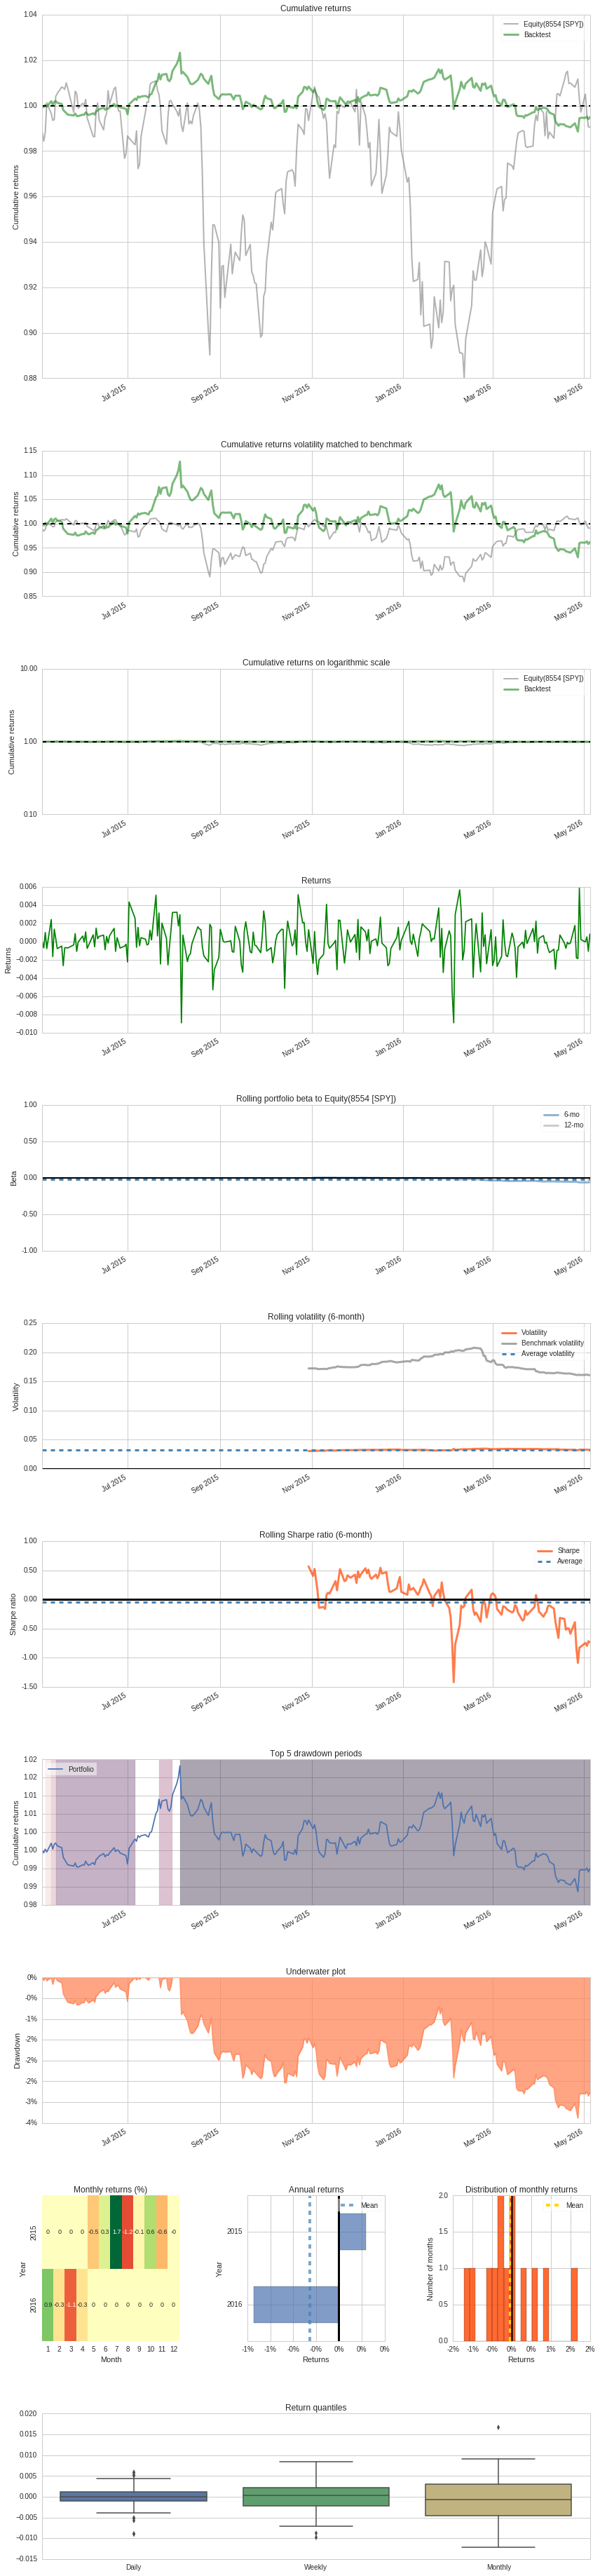

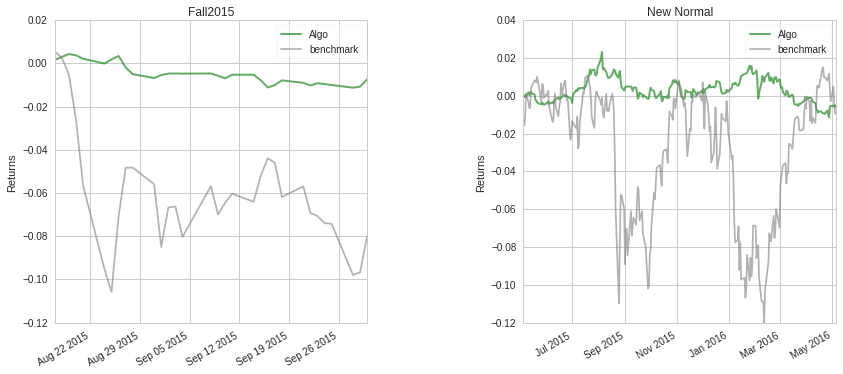

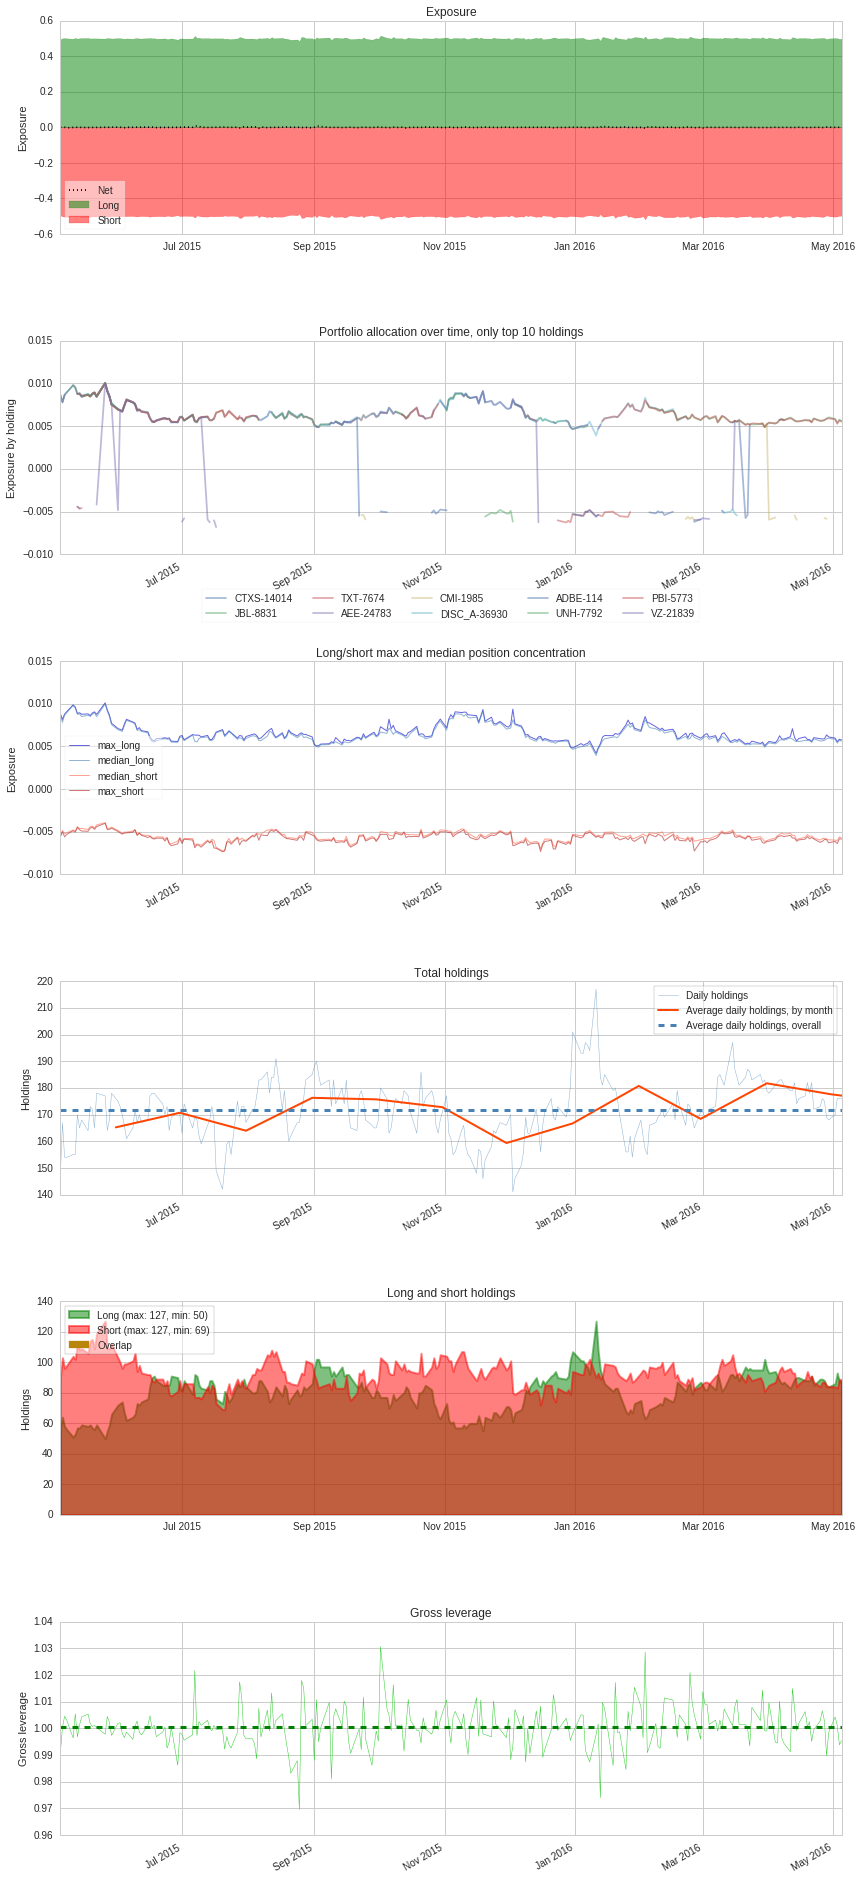

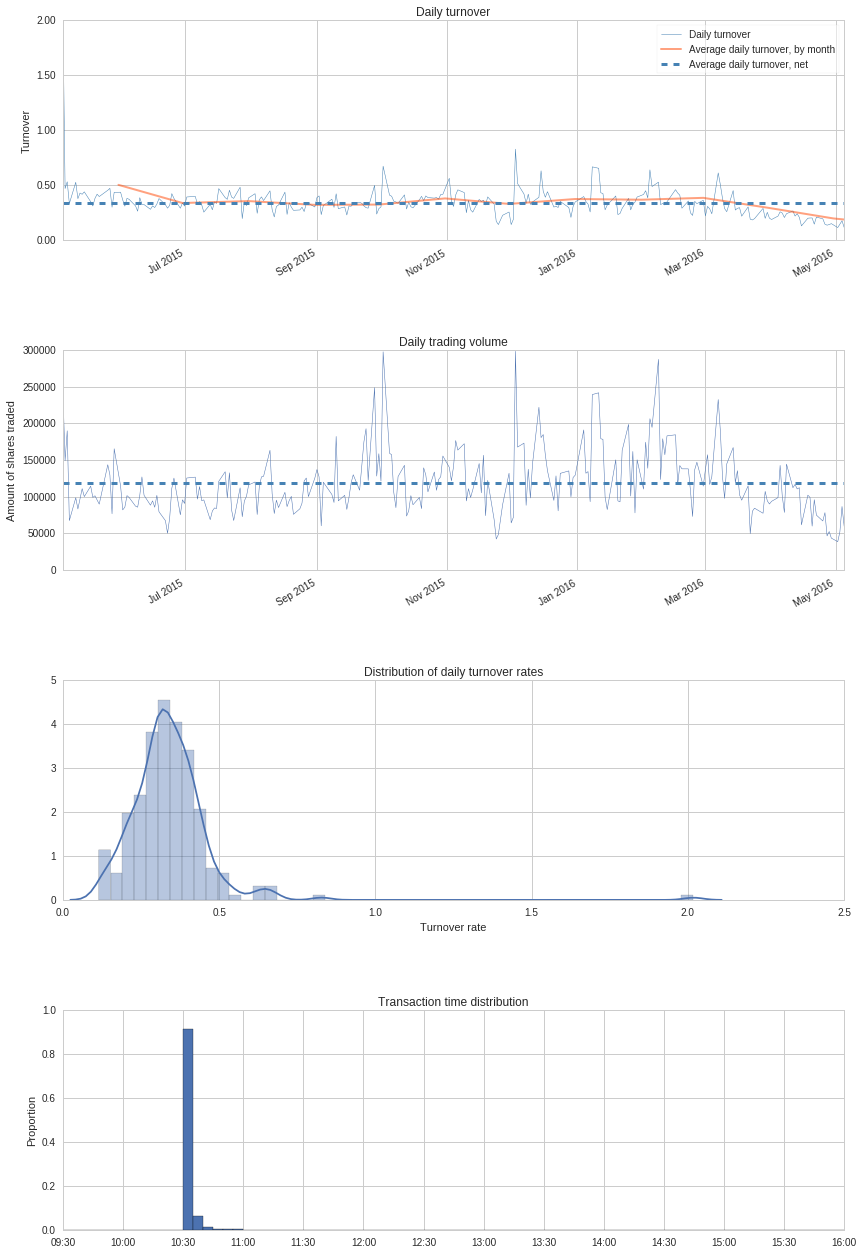

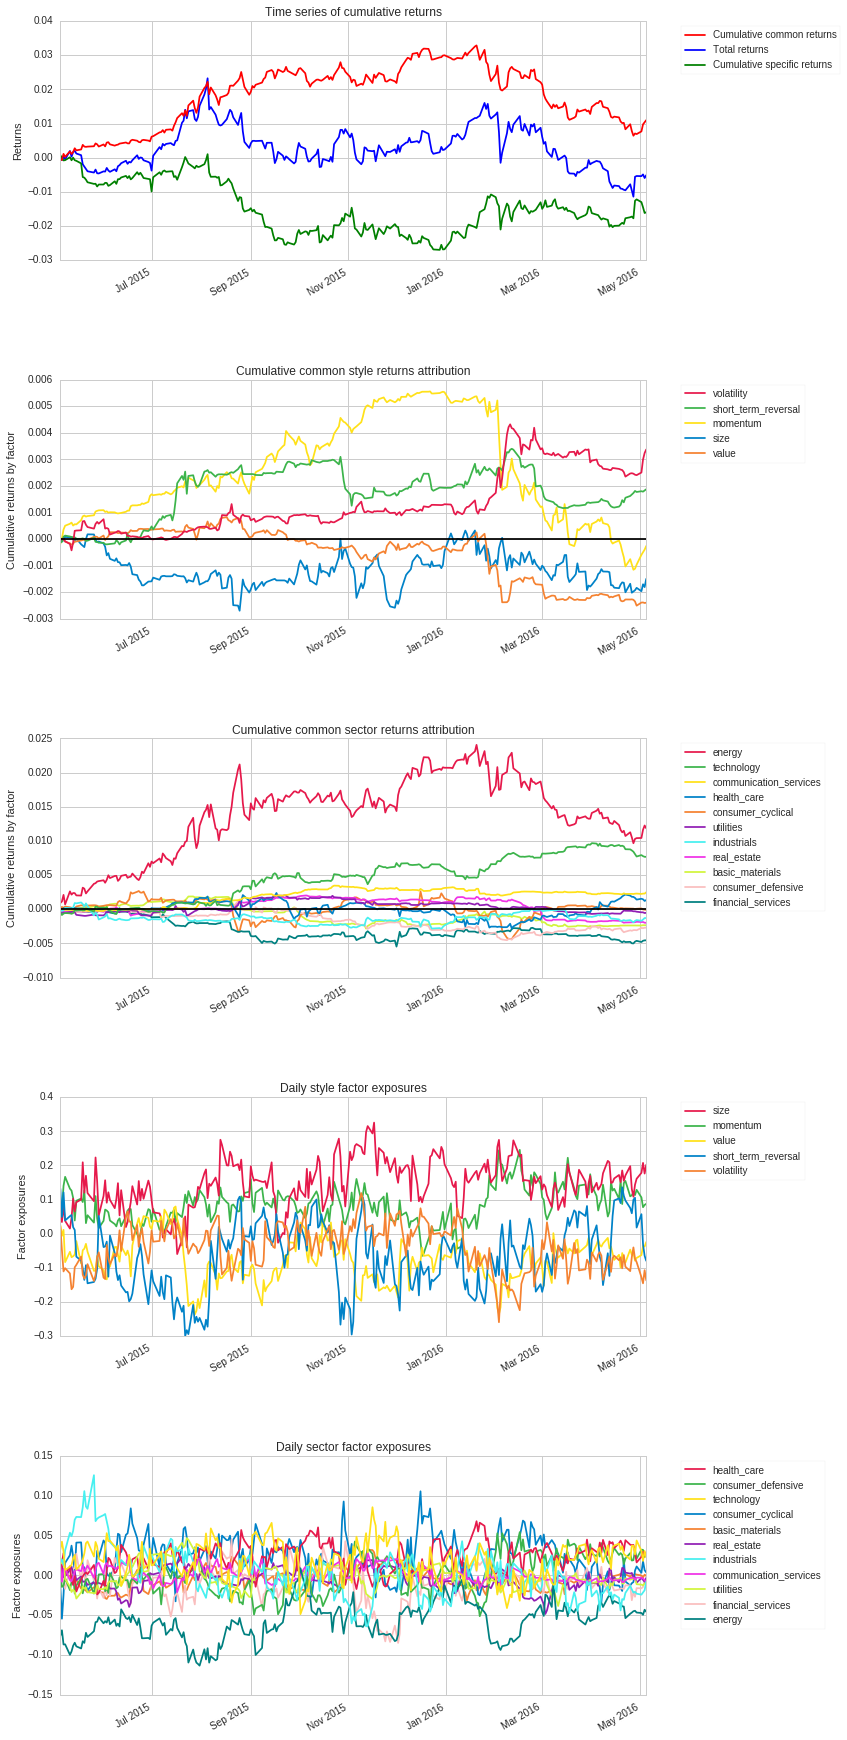

In [2]:
bt.create_full_tear_sheet()